<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_out_2020/blob/main/PSD_USA_ROTINAS_out_05_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 2.7MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 13.50 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 16.34 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [8]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

Cloning into 'marquesgabi_set_2020'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 266 (delta 44), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (266/266), 7.00 MiB | 4.96 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020


In [9]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [10]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 15.09 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [11]:
df=Segmenta(img)


In [12]:
print(df)

    Width           0           1  ...         781         782         783
0     143   71.918777   71.028854  ...    7.080933    8.027971    7.367499
1     121  107.572647  105.466644  ...  114.264122  110.703430   94.505234
2     153   47.527790   28.004530  ...   67.277206   67.234520   70.999924
3     165   98.228691   93.192291  ...    6.244151    6.174215    6.122792
4     113    1.000000    0.980108  ...   49.952148   48.199707   46.697472
..    ...         ...         ...  ...         ...         ...         ...
45    169   77.021568   77.264549  ...    6.102762    6.079233    6.412556
46    130   83.174210   76.514786  ...  113.343918  115.218941  117.194328
47    192   49.899734   66.588104  ...   54.209194   56.949215   58.894096
48    176    0.000000    0.000000  ...    6.427686    6.336260    6.427169
49    170  119.840698  112.986725  ...  103.995026   98.690521   95.845406

[150 rows x 785 columns]


In [13]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 9.9184 - accuracy: 0.4461 
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0371 - accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.5743
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.5918
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 2.0748 - accuracy: 0.5364
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 2.8546 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.7736 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8457 - accuracy: 0.6356
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 1.4533 - accuracy: 0.4956
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9562 - accuracy: 0.5423
Epoch 11

In [14]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 5.8933 - accuracy: 0.4577 
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 2.5367 - accuracy: 0.5627
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 3.9542 - accuracy: 0.4956
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 4.8538 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 4.4169 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 3.2670 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5685 - accuracy: 0.5015
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7638
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.5860
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8076
Epoch 11

In [15]:
#print(confusion_matrix)

In [16]:
#print(METRICS)

In [17]:
#print(y_pred.ravel())

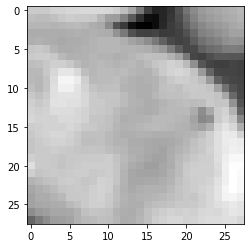

In [18]:
Size=28
qual_img=8
data=np.array(df.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [19]:
Escolha=['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 
         'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 
         'IMC1', 'IMC2']

Prop=Escolha[1] 

In [20]:
Width_All=df['Width']
df=df.drop('Width',axis=1)
#df_mahotas=Mahotas(Prop,df,Width_All)
Features_Total=Mahotas(Prop,df,Width_All)
print(Features_Total)

     N_peaks  Media_proem         Area  ...       Mode        Mean          Sd
0          1     6.916667     3.137500  ...   0.000000    0.130729    0.244268
1          2     7.435417   609.372135  ...   1.881250   29.815625   60.507113
2          2    26.256771  1625.611719  ...   2.693750   76.704948   68.920356
3          2    15.020833  3514.724479  ...   3.875000  158.353255  149.710549
4          3     7.915625   392.400000  ...   2.575000   16.970313   16.371851
..       ...          ...          ...  ...        ...         ...         ...
145        2    10.101042   261.932031  ...   0.187500   11.630339   15.163175
146        3    14.033333   874.898698  ...   3.465625   39.969531   43.320560
147        5    26.326458  3335.984115  ...  12.543750  144.649609   99.563389
148        2     5.996354   334.185937  ...   0.000000   16.609505   29.452863
149        4    21.569792  1161.081510  ...   8.550000   49.472005   57.628119

[150 rows x 10 columns]
